# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
df = pd.read_csv("D:\weather.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


# Cleaning and Processing the dataset

In [3]:
df['Temperature (C)']=df['Temperature (C)'].astype('float')
df['Apparent Temperature (C)']=df['Apparent Temperature (C)'].astype('float')
df['Humidity']=df['Humidity'].astype('float')
df['Wind Speed (km/h)']=df['Wind Speed (km/h)'].astype('float')
df['Wind Bearing (degrees)']=df['Wind Bearing (degrees)'].astype('int')
df['Visibility (km)']=df['Visibility (km)'].astype('float')
df['Pressure (millibars)']=df['Pressure (millibars)'].astype('float')

In [4]:
df['Precip Type'].fillna(df['Precip Type'].value_counts().index[0],inplace=True)

In [5]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

<AxesSubplot:>

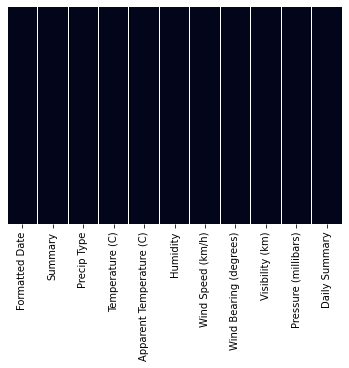

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [7]:
import datetime as dt
from datetime import timedelta

In [8]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"])

# Performing Exploratory Data Analysis

In [9]:
Weather=df['Summary'].value_counts().reset_index()
Weather.columns=['Weather','Count']
Weather

,Weather,Count
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


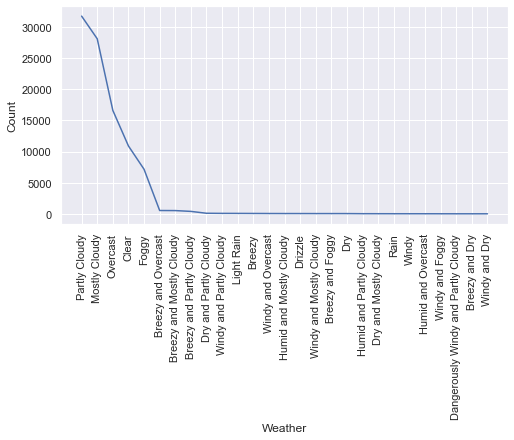

In [10]:
sns.set(rc={'figure.figsize':(8,4)})
plt.xticks(rotation=90)
sns.lineplot(x=Weather['Weather'], y=Weather['Count'],data=Weather)
plt.show()

<AxesSubplot:title={'center':'Weather'}, xlabel='Summary', ylabel='Temperature (C)'>

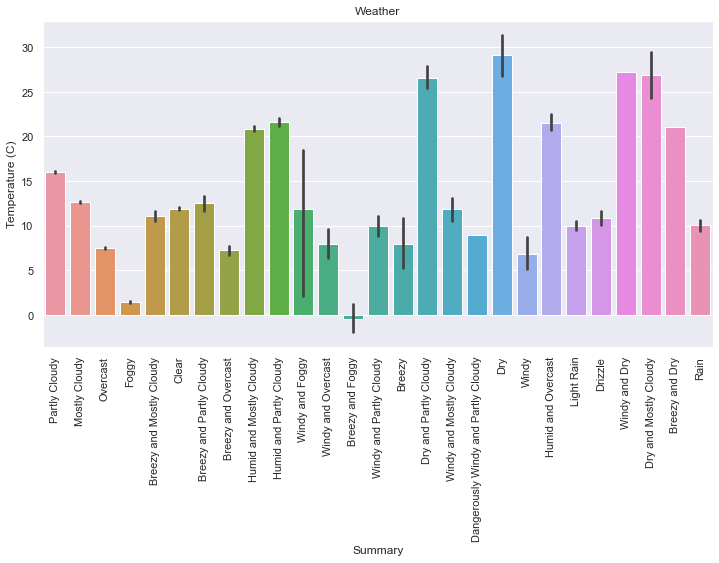

In [11]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather')
sns.barplot(x=df['Summary'],y=df['Temperature (C)'])

<AxesSubplot:title={'center':'Weather'}, xlabel='Summary', ylabel='Humidity'>

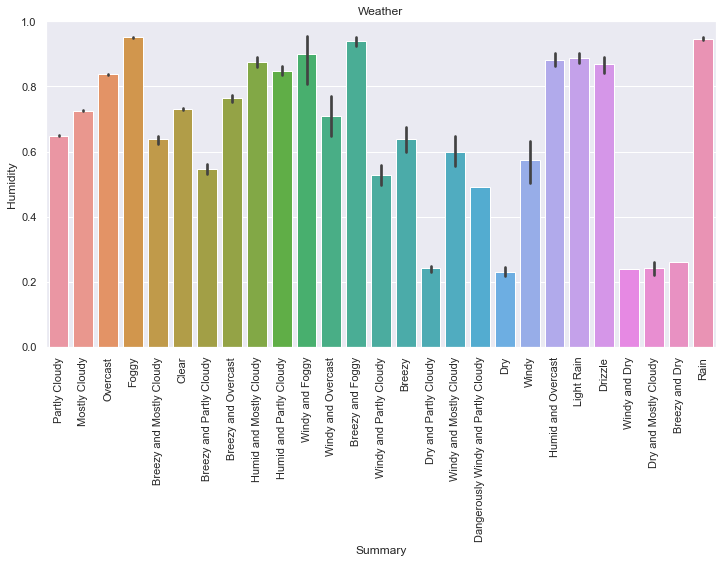

In [12]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather')
sns.barplot(x=df['Summary'],y=df['Humidity'])

<AxesSubplot:title={'center':'Weather v/s Pressure'}, xlabel='Summary', ylabel='Pressure (millibars)'>

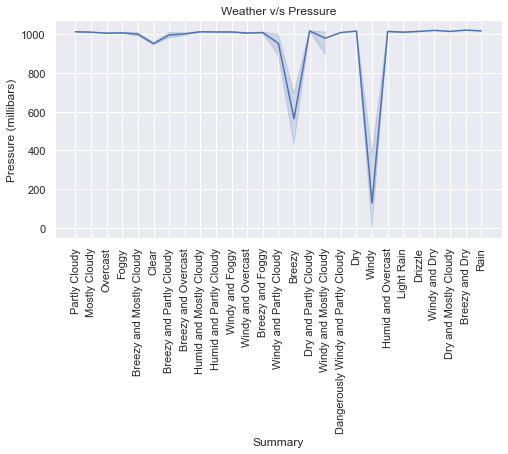

In [14]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
plt.title('Weather v/s Pressure')
sns.lineplot(y=df['Pressure (millibars)'],x=df['Summary'])